In [1]:
import keras


Using TensorFlow backend.


In [2]:
keras.backend.backend()

'tensorflow'

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


NOrmalization perfor,ed 

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Applyiong Model 

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()

model.add(Flatten(input_shape = [28,28]))

model.add(Dense(28,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                290       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 22,380
Trainable params: 22,380
Non-trainable params: 0
_________________________________________________________________


# COmpile MOdel

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
         epochs=3,
         batch_size=16,
         verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
 - 11s - loss: 0.6058 - accuracy: 0.7861 - val_loss: 0.4798 - val_accuracy: 0.8288
Epoch 2/3
 - 11s - loss: 0.4274 - accuracy: 0.8476 - val_loss: 0.4646 - val_accuracy: 0.8355
Epoch 3/3
 - 11s - loss: 0.3928 - accuracy: 0.8596 - val_loss: 0.4177 - val_accuracy: 0.8530


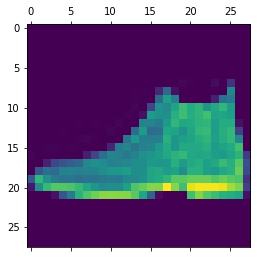

In [13]:
import matplotlib.pyplot as plt 
plt.matshow(X_test[0])

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
yp = model.predict(X_test)

In [17]:
yp[0]

array([2.1894171e-07, 5.9695949e-06, 2.3625901e-09, 1.3804354e-06,
       7.4521580e-08, 3.2064833e-02, 1.4034830e-09, 9.6994750e-02,
       9.4443397e-04, 8.6998826e-01], dtype=float32)

In [19]:
import numpy as np
np.argmax(yp[0])

9

check accuracy 

In [20]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 53us/step


[0.41769202699661256, 0.8529999852180481]